# Uber Case Study
** **


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [2]:
# While importing the csv, enable date parsing in the date specific columns
# Also convert all hardcoded NA values to python specific np.NaN using na_values
df = pd.read_csv('Uber Request Data.csv', parse_dates=[4,5], dayfirst=True, na_values="NA")

In [3]:
# Extract hour from the Request timestamp
df["RequestHour"] = df["Request timestamp"].dt.hour

# Separate 5 different timeslots from the Hour - Dawn, Early Morning, Noon, Late Evening, Night
df["TimeSlot"] = df["RequestHour"].apply(lambda x: "Dawn" if x<=4 else ("Early Morning" if x<=9 else ("Noon" if x<=16 else ("Late Evening" if x<=21 else "Night"))))

# Distinguish the Supply-Demand Gap by a new variable Cab Availability where Supply is when Trip is Completed, all else is Demand
df["Cab Availability"] = df["Status"].apply(lambda x: "Available" if x=="Trip Completed" else "Not Available")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestHour,TimeSlot,Cab Availability
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Noon,Available
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Late Evening,Available
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Early Morning,Available
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Late Evening,Available
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Early Morning,Available


Text(0.5,1,'Frequency of Requests by Hour')

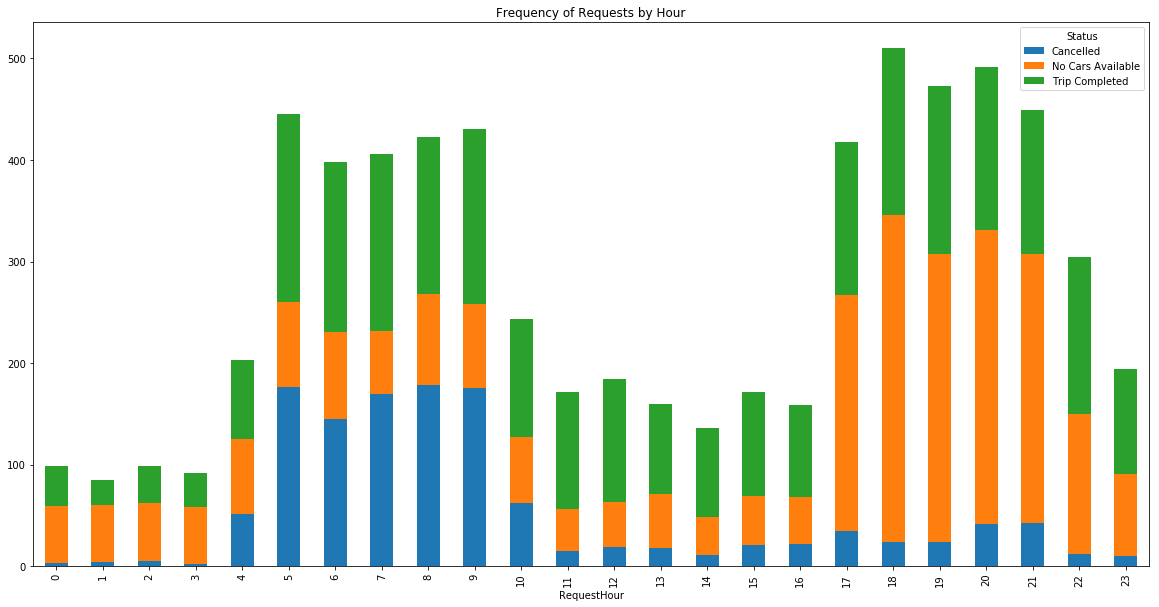

In [4]:
# Frequency of Requests by Hour
df.groupby(['RequestHour','Status']).size().unstack().plot(kind='bar', stacked=True,figsize=(20, 10))
plt.title('Frequency of Requests by Hour')

Text(0,0.5,'')

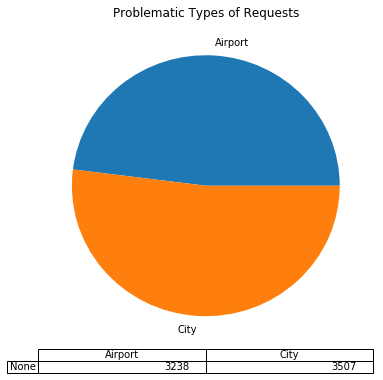

In [5]:
#  Most problematic types of Requests
df.groupby(['Pickup point']).size().plot(kind="pie",stacked=True,figsize=(6, 6),table=True,title="Problematic Types of Requests")
plt.ylabel("")

Text(0,0.5,'')

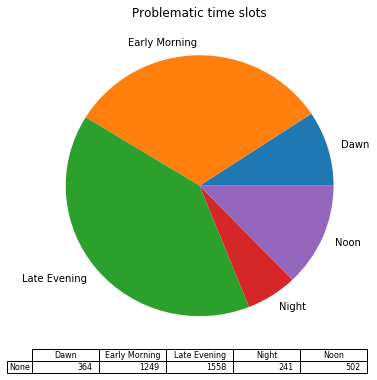

In [6]:
# Most Problematic time slots 
df[(df["Cab Availability"]=="Not Available")].groupby(['TimeSlot']).size().plot(kind="pie",stacked=True,figsize=(6, 6),table=True,title="Problematic time slots")
plt.ylabel("")

Text(0.5,1,'Demand-Supply Gap from Airport to City')

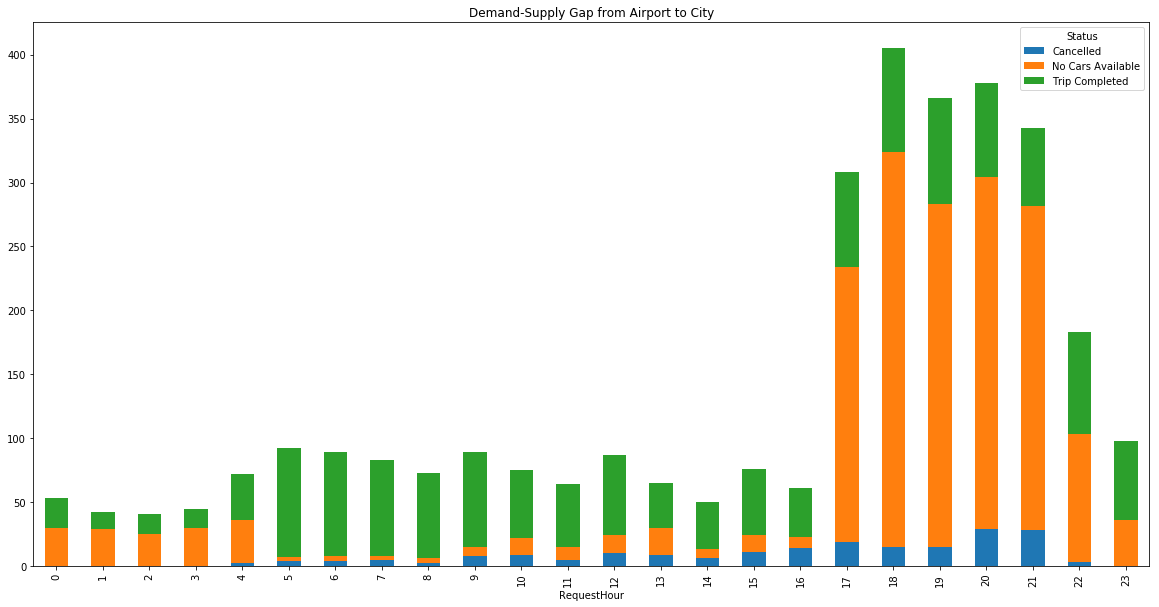

In [7]:
# Demand-Supply Gap from Airport to City
df[(df['Pickup point']=="Airport")].groupby(['RequestHour','Status']).size().unstack().plot(kind='bar', stacked=True,figsize=(20, 10))
plt.title('Demand-Supply Gap from Airport to City')

Text(0.5,1,'Demand-Supply Gap from City to Airport')

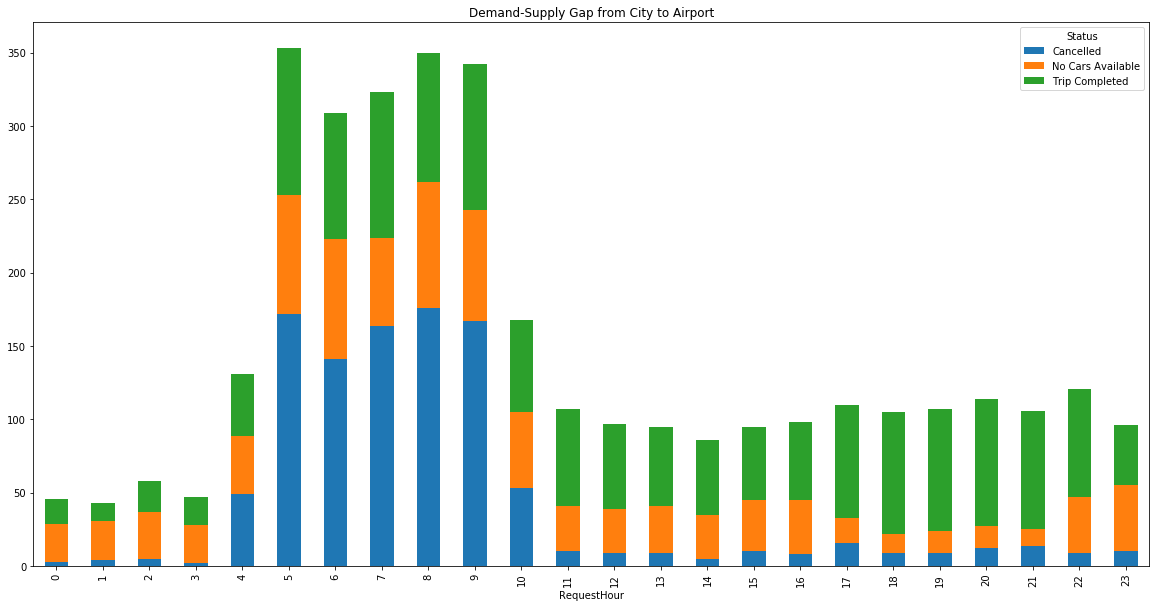

In [8]:
# Demand-Supply Gap from City to Airport
df[(df['Pickup point']=="City")].groupby(['RequestHour','Status']).size().unstack().plot(kind='bar', stacked=True,figsize=(20, 10))
plt.title('Demand-Supply Gap from City to Airport')

Text(0.5,1,'Time slots where highest Gap exists')

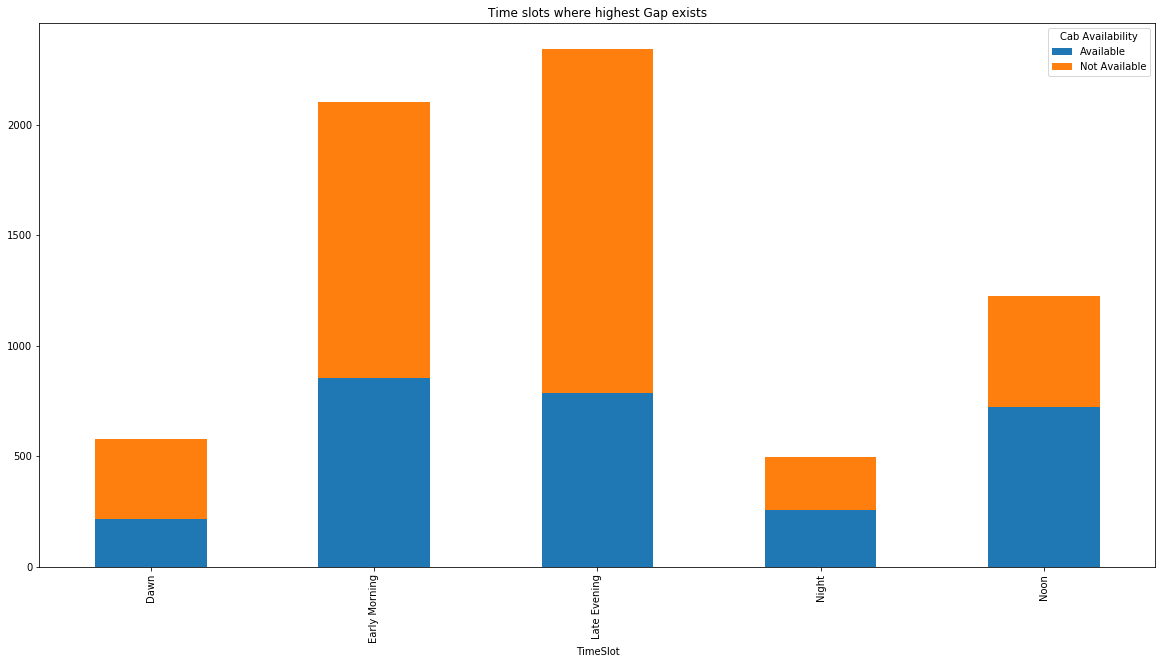

In [9]:
# Time slots where highest Gap exists
df.groupby(['TimeSlot','Cab Availability']).size().unstack().plot(kind='bar', stacked=True,figsize=(20, 10))
plt.title('Time slots where highest Gap exists')

Text(0,0.5,'')

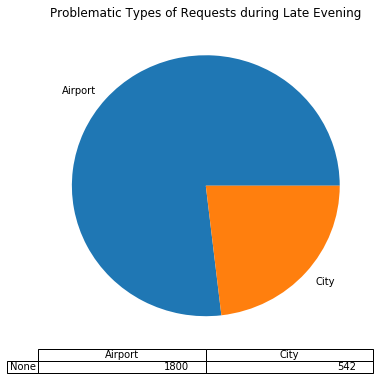

In [10]:
#  Types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots
df[df["TimeSlot"]=="Late Evening"].groupby(['Pickup point']).size().plot(kind="pie",stacked=True,figsize=(6, 6),table=True,title="Problematic Types of Requests during Late Evening")
plt.ylabel("")